## Import Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, metrics
from sklearn import model_selection
from sklearn import linear_model, tree, ensemble, neighbors
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
%matplotlib inline

## Executive Summary

In [221]:
plt.rcParams["figure.figsize"] = [10,5]

## Problem Statement

Using the responses gathered from married individuals, we will build a model to predict whether or not an individual will commit extramarital affair based on his/her profile. We will also try to find traits prevalent in individuals committing extramarital affair

## Dataset

In [222]:
sm.datasets

<module 'statsmodels.datasets' from 'C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\datasets\__init__.pyc'>

In [223]:
affair=sm.datasets.fair.load()

In [224]:
affair.data

rec.array([( 3.,  32.,   9. ,  3.,  3.,  17.,  2.,  5.,  0.1111111),
           ( 3.,  27.,  13. ,  3.,  1.,  14.,  3.,  4.,  3.2307692),
           ( 4.,  22.,   2.5,  0.,  1.,  16.,  3.,  5.,  1.3999996), ...,
           ( 5.,  22.,   2.5,  0.,  2.,  14.,  3.,  1.,  0.       ),
           ( 5.,  32.,   6. ,  1.,  3.,  14.,  3.,  4.,  0.       ),
           ( 4.,  22.,   2.5,  0.,  2.,  16.,  2.,  4.,  0.       )], 
          dtype=[('rate_marriage', '<f8'), ('age', '<f8'), ('yrs_married', '<f8'), ('children', '<f8'), ('religious', '<f8'), ('educ', '<f8'), ('occupation', '<f8'), ('occupation_husb', '<f8'), ('affairs', '<f8')])

In [225]:
df=pd.DataFrame(affair.data)

Dataset is obtained from Statsmodel dataset<br>
It contains responses on marriage happiness and extramarital affair survey published in Yale Journal of Political Economy.

Dictionary for dataset is as follows:

**Column**|**Type**|**Description**|**Key**
:-----:|:-----:|:-----:|:-----:
rate_marriage|Integer|How happy is the marriage|1=very poor, 2=poor, 3=fair, 4=good, 5=very good
age|Integer|Age|
yrs_married|Integer|No. years married. Interval approximations|
children|Integer|Number of children|
religious|Integer|How religious|1 = not, 2 = mildly, 3 = fairly, 4 = strongly
educ|Integer|Level of education|9=grade school, 12 = high school, 14=some college, 16=college graduate, 17=some graduate school, 20 = advanced degree
occupation|Integer|Occupation|1 = student, 2 = farming, agriculture; semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree
occupation_husb|Integer|Husband's Occupation|1 = student, 2 = farming, agriculture; semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree
affairs|Integer|Measure of time spent in extramarital affair|Shown as a fraction of 1

## Risk and Assumptions

 - Assumptions:
 >  - Data is accurately recorded
 >  - Respondents are honest
 
 - Risks:
 >  - Respondent is not representative of the society
 >  - inaccurate response

## Hypothesis

Null hypothesis, $H_0$: There is no relationship between a person's marriage happiness and his/her tendency of having extramarital affair <br>
Alternative hypothesis, $H_1$: Married individuals who are not happy with their marriage have higher tendency of committing extramarital affair

## Success Metrics

Ability to predict probability of extramarital affair given a profile

## Exploratory Data Analysis

In [226]:
#df = pd.read_csv("C:/Users/n0rv1/Desktop/DataScience/Final Project/Fair.csv")

In [227]:
df.shape

(6366, 9)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [229]:
df['rate_marriage']=df.rate_marriage.astype(int)
df['occupation']=df.occupation.astype(int)
df['occupation_husb']=df.occupation_husb.astype(int)
df['religious']=df.religious.astype(int)

There is no missing value in dataset

In [230]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17.0,2,5,0.111111
1,3,27.0,13.0,3.0,1,14.0,3,4,3.230769
2,4,22.0,2.5,0.0,1,16.0,3,5,1.400000
3,4,37.0,16.5,4.0,3,16.0,5,5,0.727273
4,5,27.0,9.0,1.0,1,14.0,3,4,4.666666


In [231]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [232]:
df2=df.copy()
df2['affairs_group'] = 0
df2['affairs_group'][df2['affairs']>0]=1
df2['affairs_group'][df2['affairs']<=0]=0
df2['child_group']=0
df2['child_group'][df2['children']<=0]=0
df2['child_group'][df2['children']>0]=1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\

## Visualizations

In [233]:
df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


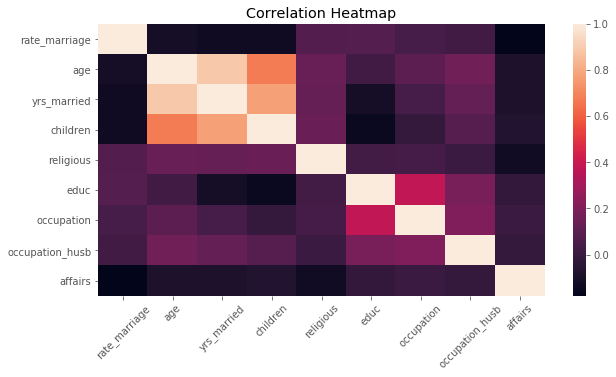

In [234]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.xticks(rotation='45')
plt.show()

In [235]:
df.corr()['affairs']

rate_marriage     -0.178068
age               -0.089964
yrs_married       -0.087737
children          -0.070278
religious         -0.125933
educ              -0.017740
occupation         0.004469
occupation_husb   -0.015614
affairs            1.000000
Name: affairs, dtype: float64

Negative correlation between religious and affairs, and rate_marriage and affairs

#### Boxplot showing religious level and amount of time spent for affair

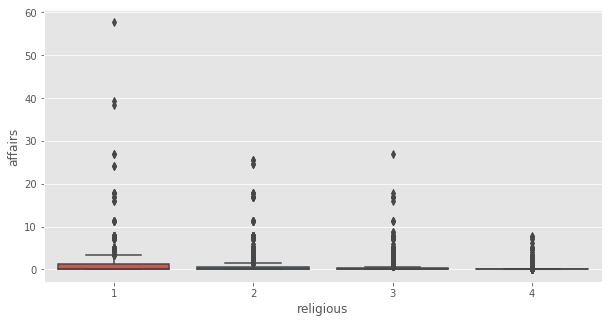

In [236]:
sns.boxplot(x='religious',y='affairs',data=df)
plt.show()

Generally more affair occurrence among individual with low religious values

#### Distribution of number of affairs

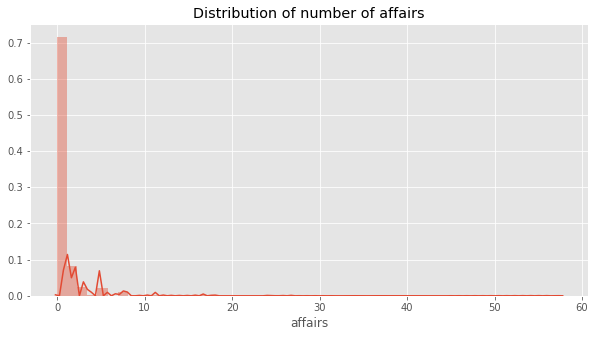

In [237]:
sns.distplot(df['affairs'])
plt.title('Distribution of number of affairs')
plt.show()

Most of the people surveyed does not commit any affair

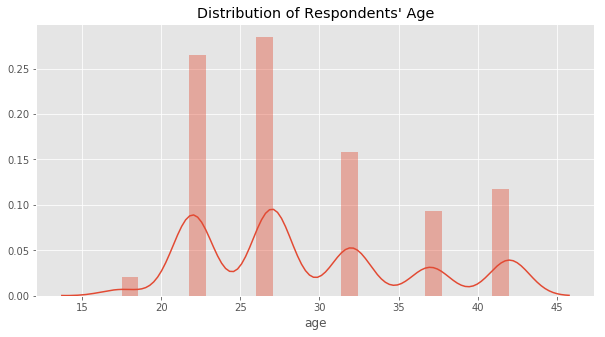

In [238]:
plt.figure(figsize = (10,5))
sns.distplot(df['age'])
plt.title("Distribution of Respondents' Age")
plt.show()

In [239]:
df.age.value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

The age of respondents are grouped into upper half and lower half of each decade, .e.g early 20s = 22, later 20s = 27. Suspect this data has been aggregated

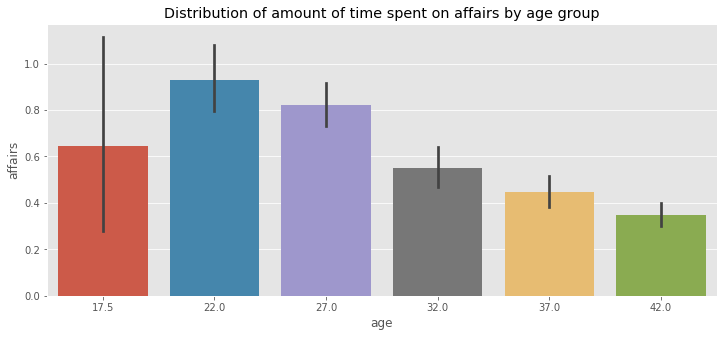

In [240]:
plt.figure(figsize=(12,5))
sns.barplot(x='age', y='affairs',data=df)
plt.title("Distribution of amount of time spent on affairs by age group")
plt.show()


Higher amount of time spent on affairs by those in early 20s

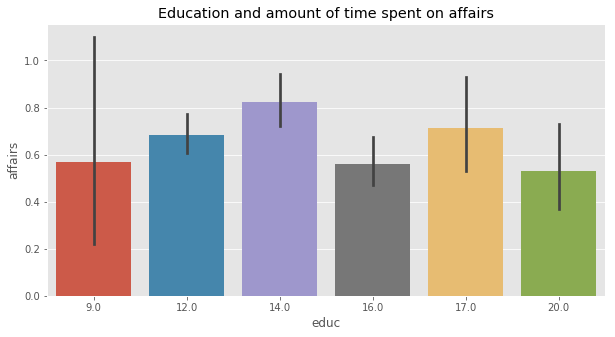

In [241]:
sns.barplot(x='educ', y='affairs',data=df)
plt.title('Education and amount of time spent on affairs')
plt.show()

Inconclusive correlation between education and amount of time spent on affair

In [242]:
pd.crosstab(index=df['rate_marriage'],columns=df['age'])

age,17.5,22.0,27.0,32.0,37.0,42.0
rate_marriage,,,,,,
1,1,10,19,22,16,31
2,6,81,89,67,48,57
3,14,225,316,174,117,147
4,45,637,712,380,229,239
5,73,847,795,426,224,319


In [243]:
df.affairs.value_counts().head()

0.000000    4313
1.400000     118
0.583333      86
0.400000      72
1.333333      72
Name: affairs, dtype: int64

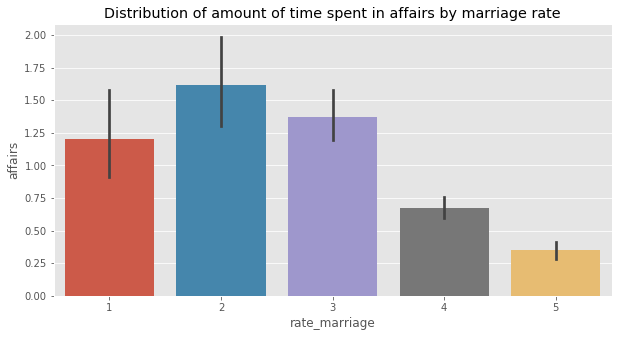

In [244]:
sns.barplot(x='rate_marriage', y='affairs',data=df)
plt.title("Distribution of amount of time spent in affairs by marriage rate")
plt.show()

It seems there is strong negative correlation between marriage happiness and amount of time spent on affairs

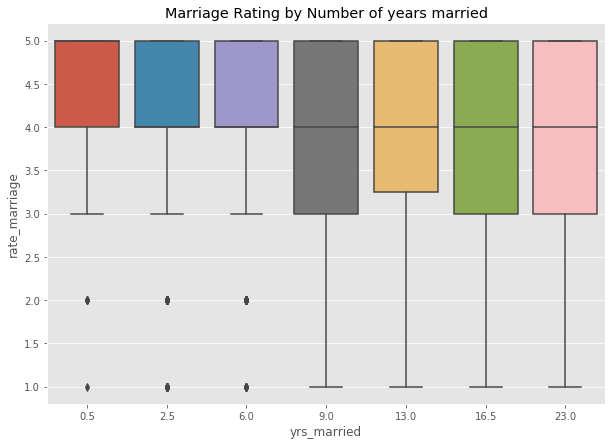

In [245]:
plt.figure(figsize=(10,7))
sns.boxplot(y='rate_marriage', x='yrs_married',data=df)
plt.title("Marriage Rating by Number of years married")
plt.show()

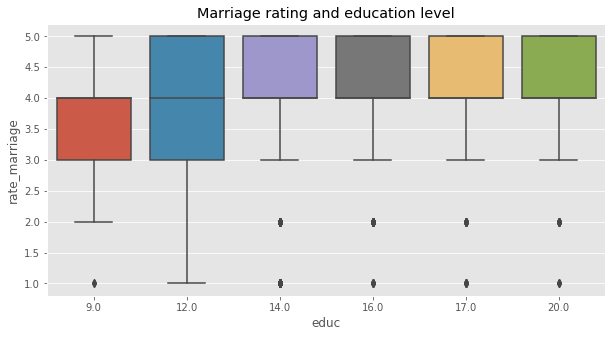

In [246]:
sns.boxplot(x='educ', y='rate_marriage', data = df)
plt.title('Marriage rating and education level')
plt.show()

#### Convert Children and Affairs to binary grouping

In [247]:
df2=df.copy()
df2['affairs_group'] = 0
df2['affairs_group'][df2['affairs']>0]=1
df2['affairs_group'][df2['affairs']<=0]=0
df2['child_group']=0
df2['child_group'][df2['children']<=0]=0
df2['child_group'][df2['children']>0]=1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\

In [248]:
df2.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_group,child_group
6361,5,32.0,13.0,2.0,3,17.0,4,3,0.0,0,1
6362,4,32.0,13.0,1.0,1,16.0,5,5,0.0,0,1
6363,5,22.0,2.5,0.0,2,14.0,3,1,0.0,0,0
6364,5,32.0,6.0,1.0,3,14.0,3,4,0.0,0,1
6365,4,22.0,2.5,0.0,2,16.0,2,4,0.0,0,0


In [249]:
pd.crosstab(df2['child_group'], df2['affairs_group'])

affairs_group,0,1
child_group,,
0,1912,502
1,2401,1551


In [ ]:
sns.swarmplot(y='affairs',x='rate_marriage',hue='child_group',data=df2)
plt.title('Respondents grouped by marriage rating and age')
plt.show()

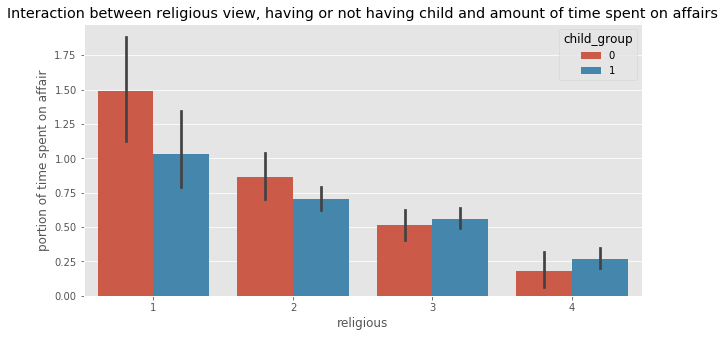

In [250]:
sns.barplot(y='affairs', x='religious',hue='child_group',data=df2)
plt.title('Interaction between religious view, having or not having child and amount of time spent on affairs')
plt.ylabel('portion of time spent on affair')
plt.show()

Negative correlation between Religious level and amount of time spent on affairs

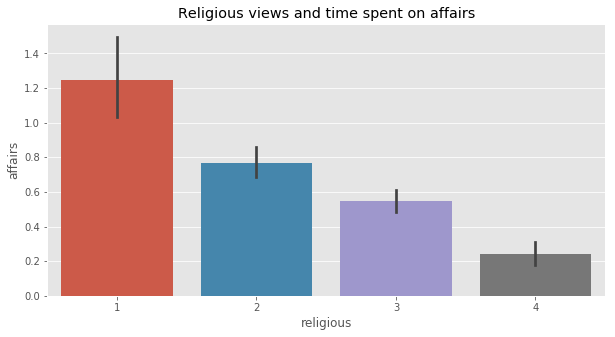

In [251]:
sns.barplot(x='religious', y='affairs',data=df2)
plt.title('Religious views and time spent on affairs')
plt.show()

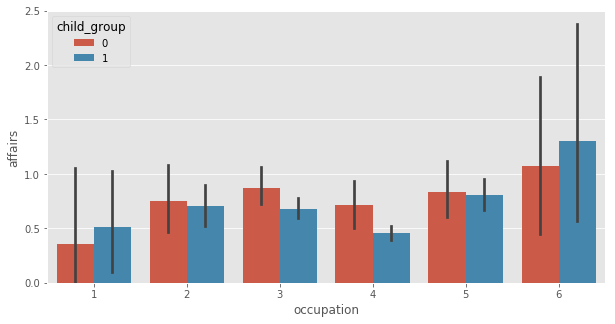

In [252]:
sns.barplot(x='occupation', y='affairs', hue='child_group', data=df2)
plt.show()

Professionals with advanced degree spend more time on affairs?

In [253]:
df3=pd.get_dummies(df2, columns=['rate_marriage', 'religious', 'occupation'], drop_first=True)
df3.head()

,age,yrs_married,children,educ,occupation_husb,affairs,affairs_group,child_group,rate_marriage_2,rate_marriage_3,rate_marriage_4,rate_marriage_5,religious_2,religious_3,religious_4,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6
0,32.0,9.0,3.0,17.0,5,0.111111,1,1,0,1,0,0,0,1,0,1,0,0,0,0
1,27.0,13.0,3.0,14.0,4,3.230769,1,1,0,1,0,0,0,0,0,0,1,0,0,0
2,22.0,2.5,0.0,16.0,5,1.400000,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,37.0,16.5,4.0,16.0,5,0.727273,1,1,0,0,1,0,0,1,0,0,0,0,1,0
4,27.0,9.0,1.0,14.0,4,4.666666,1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [254]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 20 columns):
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
educ               6366 non-null float64
occupation_husb    6366 non-null int32
affairs            6366 non-null float64
affairs_group      6366 non-null int64
child_group        6366 non-null int64
rate_marriage_2    6366 non-null uint8
rate_marriage_3    6366 non-null uint8
rate_marriage_4    6366 non-null uint8
rate_marriage_5    6366 non-null uint8
religious_2        6366 non-null uint8
religious_3        6366 non-null uint8
religious_4        6366 non-null uint8
occupation_2       6366 non-null uint8
occupation_3       6366 non-null uint8
occupation_4       6366 non-null uint8
occupation_5       6366 non-null uint8
occupation_6       6366 non-null uint8
dtypes: float64(5), int32(1), int64(2), uint8(12)
memory usage: 447.7 KB


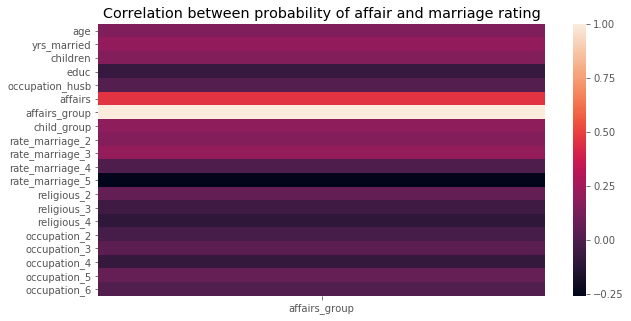

In [255]:
sns.heatmap(df3.corr()[['affairs_group']])
plt.title('Correlation between probability of affair and marriage rating')
plt.show()

In [256]:
df3.corr()[['affairs_group']]

,affairs_group
age,0.146519
yrs_married,0.203109
children,0.159833
educ,-0.075280
occupation_husb,0.017637
affairs,0.464046
affairs_group,1.000000
child_group,0.191515
rate_marriage_2,0.160799
rate_marriage_3,0.210025


### Define X and y

In [257]:
factors=df3.columns[7:]
#factors.append(df3.columns[7:])

In [258]:
X=np.array(df3[factors])
y=df3['affairs_group']

#### KNN model with 5 neighbors

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [261]:
knn=KNeighborsClassifier(5).fit(X_train,y_train)
test_preds=knn.predict(X_test)
metrics.accuracy_score(test_preds,y_test)

0.68969849246231152

#### KNN with Cross Validation:

In [270]:
kf=KFold(n_splits=10, random_state=10, shuffle=True)
scores=[]
for train_index, test_index in kf.split(X,y):
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    knn=KNeighborsClassifier(5).fit(X_train,y_train)
    test_preds=knn.predict(X_test)
    accuracy=metrics.accuracy_score(test_preds,y_test)
    scores.append(accuracy)
print ('KNN Mean Accuracy: ', np.mean(scores))

('KNN Mean Accuracy: ', 0.50723048290433737)


#### Logistic Regression

In [266]:
lr=linear_model.LogisticRegressionCV(cv=5)
lr.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [269]:
predicted=lr.predict(X)
accuracy=metrics.accuracy_score(predicted, y)
print 'Logistic Regression Accuracy: ', accuracy

Logistic Regression Accuracy:  0.724630851398


#### Decision Tree Model

In [273]:
dt=tree.DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [277]:
#accuracy
scores=model_selection.cross_val_score(dt,X,y,scoring='accuracy',cv=5)
print 'Average Accuracy: ',scores.mean()

Average Accuracy:  0.711279780417


#### Random Forest model

## Findings